In [230]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [231]:
df = pd.read_csv('D:\excelR\Decision_Trees\Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [233]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [234]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [235]:
from sklearn.preprocessing import LabelEncoder
cols = ['Undergrad', 'Marital.Status', 'Urban']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


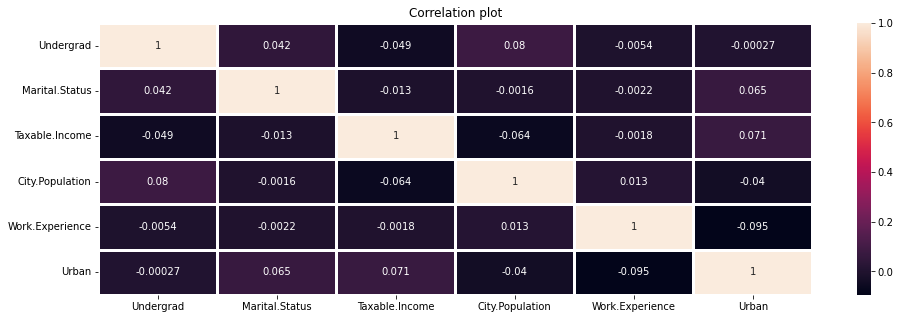

In [236]:
import seaborn as sns 
plt.figure(figsize = (16,5))
corr_plot = sns.heatmap(df.corr(),annot = True,linewidths=3)
plt.title("Correlation plot")
plt.show()

In [237]:
df['Tax_labels'] = pd.cut(x=df['Taxable.Income'], bins=[0,30000,99999], labels=['Risky', 'Good'], right=False)
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_labels
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


## Model Validation

# Train-Test-Split

In [199]:
from sklearn.model_selection import train_test_split
y = df.pop("Tax_labels")
X = df.iloc[:,0:7]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.8)

print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (480, 6)
train size y :  (480,)
test size X :  (120, 6)
test size y :  (120,)


# GridSearch Cross Validation

In [238]:
from sklearn.model_selection import GridSearchCV
y2 = df.pop("Tax_labels")
x2 = df.iloc[:,0:7]

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=x2, y=y2)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9983333333333334 {'max_depth': 3}


# Building Decision Tree Classifier using Entropy Criteria

In [200]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

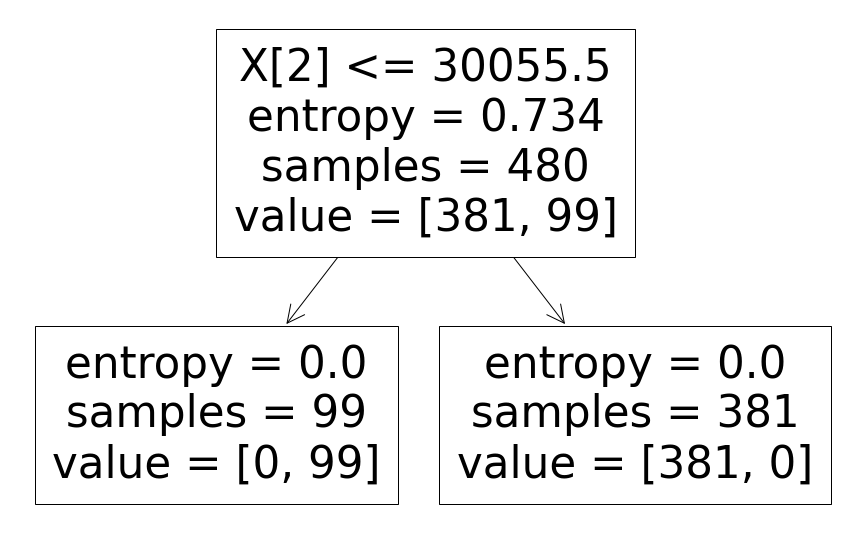

In [201]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(model);

In [202]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good     95
Risky    25
dtype: int64

In [203]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good,Risky
Tax_labels,,
Risky,0,25
Good,95,0


In [204]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy = accuracy_score(y_test,preds)
report = classification_report(y_test,preds)
cm = confusion_matrix(y_test,preds)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  1.0
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        95
       Risky       1.00      1.00      1.00        25

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Confusion matrix:
[[95  0]
 [ 0 25]]


# Building Decision Tree Classifier (CART) using Gini Criteria

In [205]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

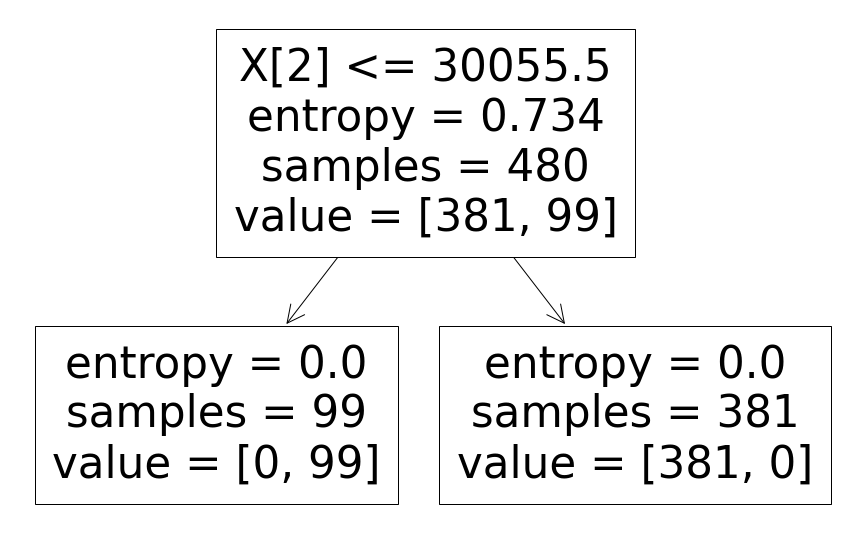

In [206]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(model);

In [207]:
#Predicting on test data
preds2 = model2.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good     95
Risky    25
dtype: int64

In [208]:
pd.crosstab(preds2,y_test) # getting the 2 way table to understand the correct and wrong predictions

Tax_labels,Risky,Good
row_0,,
Good,0,95
Risky,25,0


In [209]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy = accuracy_score(y_test,preds2)
report = classification_report(y_test,preds2)
cm = confusion_matrix(y_test,preds2)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  1.0
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        95
       Risky       1.00      1.00      1.00        25

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Confusion matrix:
[[95  0]
 [ 0 25]]


# Building Decision Tree Regressor

# Normalizing Data

In [245]:
from sklearn.preprocessing import normalize
df_norm = normalize(df.iloc[:,0:7])
df_norm=pd.DataFrame(df_norm,columns=df.columns)
df_norm.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0.000000,0.000024,0.808811,0.588069,0.000118,0.000012
1,0.000007,0.000000,0.243769,0.969833,0.000130,0.000007
2,0.000000,0.000006,0.224597,0.974452,0.000182,0.000006
3,0.000005,0.000010,0.251359,0.967894,0.000075,0.000005
4,0.000000,0.000012,0.946800,0.321822,0.000327,0.000000


# Model Validation 

# Train-Test-Split

In [211]:
from sklearn.model_selection import train_test_split
y1 = df.pop("Taxable.Income")
X1 = pd.concat([df_norm.iloc[:,0:3],df_norm.iloc[:,4:7]],axis=1)

X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,random_state=45,train_size=0.8)

print("train size X : ",X1_train.shape)
print("train size y : ",y1_train.shape)
print("test size X : ",X1_test.shape)
print("test size y : ",y1_test.shape)


train size X :  (480, 5)
train size y :  (480,)
test size X :  (120, 5)
test size y :  (120,)


In [212]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
df2=model.fit(X1_train, y1_train)

In [213]:
#Find the accuracy
df2.score(X1_test,y1_test)

0.8343363256531539

In [214]:
y_pred = df2.predict(X1_test)

In [215]:
df2=pd.DataFrame({'Actual':y1_test, 'Predicted':y_pred})
df2

,Actual,Predicted
491,24541,47425.0
4,81002,62873.0
64,62158,62067.0
407,33138,42063.0
61,26972,27520.0
...,...,...
325,94013,91462.0
139,50087,60822.0
335,33301,43128.0
457,11804,17440.0


In [216]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y_pred)))

Mean Absolute Error: 7735.45
Mean Squared Error: 118267296.66666667
Root Mean Squared Error: 10875.076857965954


Text(0.5, 0, 'Actuals')

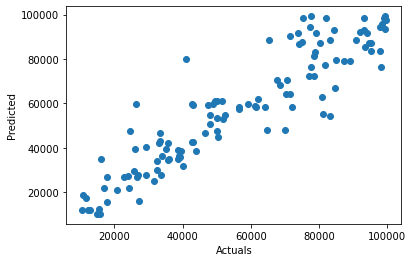

In [217]:
plt.scatter(x=df2['Actual'], y=df2['Predicted'])
plt.ylabel('Predicted')
plt.xlabel('Actuals')

# GridSearch Cross Validation

In [246]:
y3 = df_norm.pop("Taxable.Income")
x3 = df_norm.iloc[:,1:7]

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=x3, y=y3)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9998851794358299 {'max_depth': 19}


In [249]:
y_pred2 = clf.predict(x3)

In [250]:
df3=pd.DataFrame({'Actual':y3, 'Predicted':y_pred2})
df3

,Actual,Predicted
0,0.808811,0.808811
1,0.243769,0.243769
2,0.224597,0.224597
3,0.251359,0.251359
4,0.946800,0.946800
...,...,...
595,0.888190,0.888190
596,0.784163,0.784163
597,0.293698,0.293698
598,0.480221,0.480221


In [252]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y3, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y3, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


Text(0.5, 0, 'Actuals')

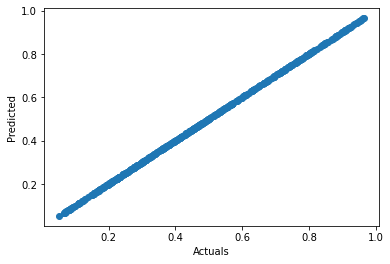

In [253]:
plt.scatter(x=df3['Actual'], y=df3['Predicted'])
plt.ylabel('Predicted')
plt.xlabel('Actuals')